# Exploring westbound traffic on the I-94 Interstate highway


[Data Source](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

**Data Set Information**: Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

## Overview

By analyzing weather and date/time data we can identify **westbound** traffic patterns, and **indicators of heavy traffic volume** on I-94 West.

Our general assumption is that adverse weather would increase traffic flows, and that certain "rush hours" will consistently see heavy traffic. An exploratory analysis will allow us to test our hypothesis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("fivethirtyeight")
# allows visuals
%matplotlib inline

data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [2]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Initial Look

9 Columns

48204 Entries, 0 Missing

Mixed ints ,floats, and objects

Weather data is split across 4 columns
1. 1 hour increments of rain/snow
2. 1 hour increments of snow
3. a general weather type
4. further details about that weather type

## Next steps

A deeper dive into the **traffic_volume** column.

A histogram will help us visualize the distribution of traffic over time.

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

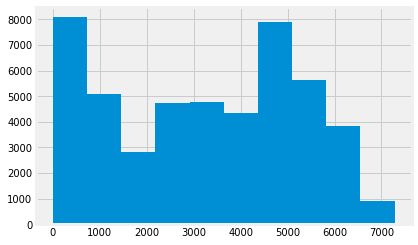

In [5]:
data["traffic_volume"].hist()
data["traffic_volume"].describe()

## Observations so far

Traffic volume is most frequently between 0-1000 and 4000-5000 units, with over 8000 hits for each respectively

Traffic volume over 7000 units is the least frequent.

Overall we can start to see that our traffic volume tends to spike up at certain points.

## Next steps

How much does **time of day** influence these spikes? 

We need to **seperate** our 24hr time period into night and day, **then plot** them for further analysis.

Our approximate time periods:

Daytime: 7am - 7pm

Nighttime: 7pm- 7am

In [6]:
# convert to datetime objects and store
data["date_time"] = pd.to_datetime(data["date_time"])

In [7]:
# 7 = 7am, 19 = 7pm
# grab the hours and filter by time period
day_time = (data.date_time.dt.hour >= 7) & (data.date_time.dt.hour <= 19)
night_time = (data.date_time.dt.hour >= 19) | (data.date_time.dt.hour <= 7)

# day_traffic = data[day_time]
# night_traffic = data[night_time]

## Day/Night Traffic Volume Histograms

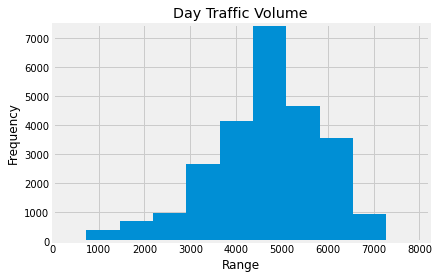

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
data["traffic_volume"][day_time].hist()
plt.title("Day Traffic Volume")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.xlim(0, 8200)
plt.ylim(0, 7500)
plt.show()

data["traffic_volume"][day_time].describe()

## Day Analysis

Distribution: Gaussian

Most of our values lie directly in the middle, with a sharp drop off on both ends.

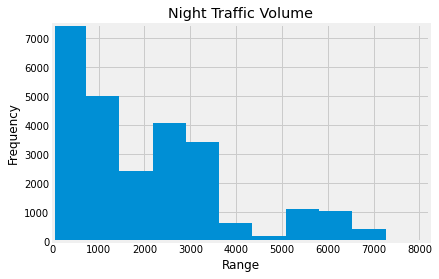

count    26406.000000
mean      2018.015375
std       1713.201969
min          0.000000
25%        581.000000
50%       1485.000000
75%       2934.000000
max       7260.000000
Name: traffic_volume, dtype: float64

In [9]:
data["traffic_volume"][night_time].hist()
plt.title("Night Traffic Volume")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.xlim(0, 8200)
plt.ylim(0, 7500)
plt.show()

data["traffic_volume"][night_time].describe()

## Night Analysis

Distribution: Negative Right Skewed

Here our values are concentrated on left, mostly in the 0-1000 range

## Observations

1. Night traffic(After 7pm) is extremely low volume.
2. Day Traffic has exponential growth

We should **focus on our daytime** traffic data as its the busiest time, and will have the most samples to investigate

# Next Steps

We will use line plots to visualize our day time traffic data, focusing on daily and monthly volumes.

# Average Monthly Traffic Volume

In [10]:
# create a new month column
# use datetime to extract the month
data["month"] = data["date_time"][day_time].dt.month

# aggregate by month and mean
data_monthly = data.groupby("month").mean()

# filter day time traffic volume by month
day_traffic_monthly = data_monthly["traffic_volume"]

# view
day_traffic_monthly

month
1.0     4385.217310
2.0     4593.187798
3.0     4761.529676
4.0     4771.232816
5.0     4788.966639
6.0     4791.087488
7.0     4502.628360
8.0     4818.434690
9.0     4755.709916
10.0    4809.481678
11.0    4588.910486
12.0    4276.567081
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Traffic Volume')

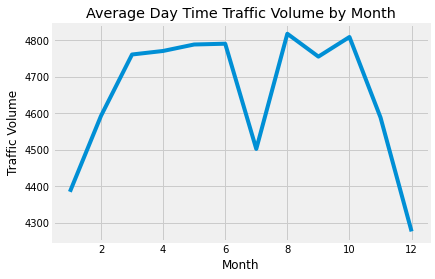

In [11]:
plt.plot(day_traffic_monthly)
plt.title("Average Day Time Traffic Volume by Month")
plt.xlabel("Month")
plt.ylabel("Traffic Volume")

## Observations

As we can see Traffic Volume  sharply drops off in two places but is otherwise mostly around 4600/car average volume.


At the beginning of the year, traffic slowly grows from an all time low of around 4276/cars in December, until it levels off around 4750/cars in March. 

Our first **downward** spike is during the month of **July**, with the second during **December**.

The drop off in July needs further analysis before we draw any conclusions. The December drop off may be due to increasing amounts of winter weather such as **snow**.


In [12]:
# create a new month column
# use datetime to extract the month
data["daily"] = data["date_time"][day_time].dt.dayofweek

# aggregate by month and mean
b = data.groupby("daily").mean()

# filter day time traffic volume by month
day_traffic_daily = data_daily["traffic_volume"]

# view
day_traffic_daily

NameError: name 'data_daily' is not defined

# Average Daily Traffic Volume

In [ ]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.plot(day_traffic_daily)
plt.xticks([0, 1, 2, 3, 4, 5, 6], days)
plt.title("Average Day Time Traffic Volume by Day")
plt.xlabel("Day")
plt.ylabel("Traffic Volume")
plt.show()

# Observations

Here we can very obviously see consistent traffic during the traditional **workweek** of Monday through Friday

## Next Steps

We will seperate our data into a weekend and weekday set. Then we can analyze the traffic by hour.

In [ ]:
data

In [ ]:
# extract each hour
data["hour"] = data["date_time"].dt.hour

# seperate m-f(0-4) from s-su(5-6)
work_days = data.copy()[data['daily'] <= 4]

# seperate m-f from s-su
non_work_days = data.copy()[data['daily'] >= 5]

# seperated mean 
work_days_hourly = work_days.groupby('hour').mean()
non_work_days_hourly = non_work_days.groupby('hour').mean()

In [ ]:
work_days_hourly

In [ ]:
non_work_days_hourly

In [ ]:
plt.plot(work_days_hourly)
plt.title("Hourly Work Week Traffic")
plt.xlabel("Hours")
plt.ylabel("Traffic Flow")
plt.xlim(5,20)
plt.ylim(1000, 7000)

In [ ]:
plt.plot(non_work_days_hourly)
plt.title("Hourly Weekend Traffic")
plt.xlabel("Hours")
plt.ylabel("Traffic Flow")
plt.xlim(5,20)
plt.ylim(1000, 7000)

# Observations

## Next Steps
Finding the correlation between weather and traffic volume

In [ ]:
data.corr()["traffic_volume"][["temp", "rain_1h", "snow_1h", "clouds_all"]]

# Observations

## Next Steps
weather_main and weather_description

In [ ]:
weather_main_grouping = data.groupby("weather_main").mean()
#print(weather_main_grouping)
weather_main_grouping["traffic_volume"].plot.barh()
plt.show()

In [ ]:
weather_desc_grouping = data.groupby("weather_description").mean()
weather_desc_grouping["traffic_volume"].plot.barh(figsize=(5,10))
plt.show()

# Conclusions 